In [11]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [12]:
Stock = 'BLK'
start = '2023-12-31'
end = '2024-01-31'

In [13]:
data = yf.download(Stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [14]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,804.150024,808.140015,795.429993,800.299988,800.299988,660000
2024-01-03,792.409973,792.409973,782.330017,784.150024,784.150024,638700
2024-01-04,783.260010,792.489990,782.729980,785.950012,785.950012,580200
2024-01-05,782.809998,788.760010,781.460022,782.830017,782.830017,471000
2024-01-08,784.429993,798.010010,782.909973,797.190002,797.190002,513200
2024-01-09,792.650024,795.140015,787.140015,794.520020,794.520020,454700
2024-01-10,794.890015,799.049988,787.869995,792.359985,792.359985,510800
2024-01-11,796.960022,799.979980,787.080017,792.609985,792.609985,735800
2024-01-12,785.000000,802.340027,782.760010,799.599976,799.599976,880500


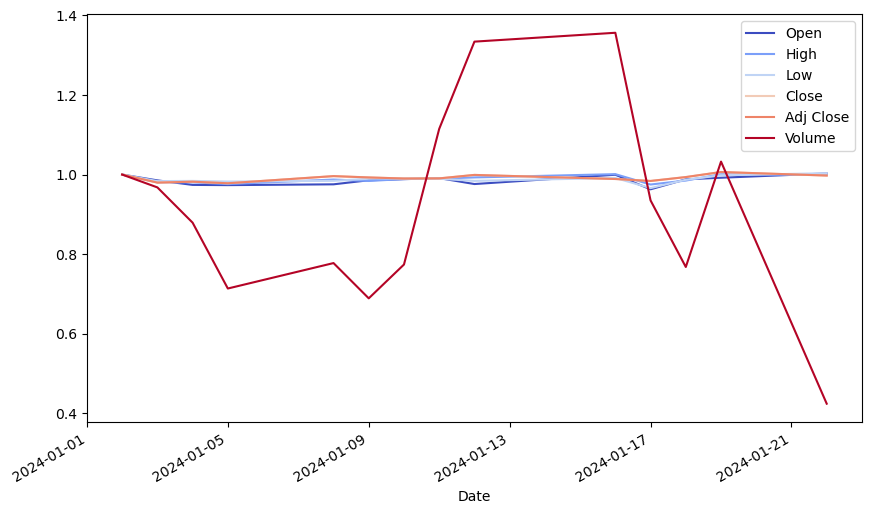

In [15]:
(data / data.iloc[0]).plot(figsize=(10, 6), cmap='coolwarm'); 

In [16]:
lags = 7

In [17]:
def add_lags(data, ric, lags):
    cols = []
    df = pd.DataFrame(data[ric])
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag) 
        df[col] = df[ric].shift(lag) 
        cols.append(col) 
    df.dropna(inplace=True) 
    return df, cols


In [18]:
dfs = {}
for sym in data.columns:
    df, cols = add_lags(data, sym, lags) 
    dfs[sym] = df

In [19]:
dfs[sym].head(7)

,Volume,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2024-01-11,735800,510800.0,454700.0,513200.0,471000.0,580200.0,638700.0,660000.0
2024-01-12,880500,735800.0,510800.0,454700.0,513200.0,471000.0,580200.0,638700.0
2024-01-16,895200,880500.0,735800.0,510800.0,454700.0,513200.0,471000.0,580200.0
2024-01-17,617100,895200.0,880500.0,735800.0,510800.0,454700.0,513200.0,471000.0
2024-01-18,506700,617100.0,895200.0,880500.0,735800.0,510800.0,454700.0,513200.0
2024-01-19,681500,506700.0,617100.0,895200.0,880500.0,735800.0,510800.0,454700.0
2024-01-22,279977,681500.0,506700.0,617100.0,895200.0,880500.0,735800.0,510800.0


In [20]:
regs = {}
for sym in data.columns:
    df = dfs[sym] 
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0] 
    regs[sym] = reg

In [21]:
rega = np.stack(tuple(regs.values())) 

In [22]:
 regd = pd.DataFrame(rega, columns=cols, index=data.columns)

In [23]:
regd

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Open,-1.401653,-0.694407,1.408588,1.876728,-2.388455,1.022273,1.179137
High,0.558246,-0.580743,1.029975,2.589513,-0.370581,-3.381681,1.144121
Low,-0.799443,-0.887723,0.699281,2.976680,-5.569846,3.061266,1.517211
Close,0.868614,-0.611529,0.079814,0.564698,-0.797215,0.534425,0.364912
Adj Close,0.868614,-0.611529,0.079814,0.564698,-0.797215,0.534425,0.364912
Volume,1.665557,-2.328586,2.071184,-0.781015,0.322601,-2.426195,2.441220


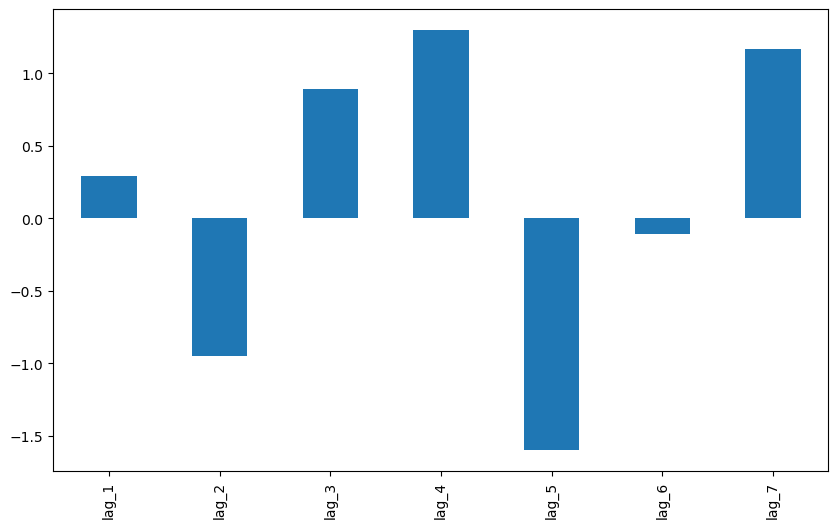

In [24]:
regd.mean().plot(kind='bar', figsize=(10, 6));

In [25]:
dfs[sym].corr()

,Volume,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Volume,1.000000,0.208656,-0.079915,-0.456150,-0.734260,-0.654806,-0.461039,0.543582
lag_1,0.208656,1.000000,0.469689,-0.316686,-0.487461,-0.460386,-0.255008,-0.073197
lag_2,-0.079915,0.469689,1.000000,0.576993,-0.074515,-0.492447,-0.778183,-0.561863
lag_3,-0.456150,-0.316686,0.576993,1.000000,0.638474,0.182633,-0.440025,-0.839967
lag_4,-0.734260,-0.487461,-0.074515,0.638474,1.000000,0.811215,0.250750,-0.654765
lag_5,-0.654806,-0.460386,-0.492447,0.182633,0.811215,1.000000,0.649686,-0.333968
lag_6,-0.461039,-0.255008,-0.778183,-0.440025,0.250750,0.649686,1.000000,0.267929
lag_7,0.543582,-0.073197,-0.561863,-0.839967,-0.654765,-0.333968,0.267929,1.000000


In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
adfuller(data[sym].dropna())

(-23.353519912731958,
 0.0,
 5,
 8,
 {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625},
 178.85077211271417)

In [28]:
rets = np.log(data / data.shift(1))

In [29]:
rets.dropna(inplace=True)

In [30]:
dfs = {}
for sym in data:
    df, cols = add_lags(rets, sym, lags) 
    mu, std = df[cols].mean(), df[cols].std() 
    df[cols] = (df[cols] - mu) / std 
    dfs[sym] = df

In [31]:
dfs[sym].head()

,Volume,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2024-01-12,0.179532,1.097495,0.369124,-0.593746,-0.130364,-1.339342,-0.572852,0.079112
2024-01-16,0.016557,0.455300,1.302850,0.334962,-1.400811,0.078462,-1.111250,-0.426110
2024-01-17,-0.372016,-0.109068,0.606429,1.307771,0.057177,-0.917901,0.297896,-1.324250
2024-01-18,-0.197112,-1.454667,-0.005594,0.582199,1.584402,0.225544,-0.692383,1.026448
2024-01-19,0.296377,-0.848988,-1.464816,-0.055442,0.445318,1.423288,0.444080,-0.625507


In [42]:
adfuller(dfs[sym]['lag_1'])

(-8.8505350806917,
 1.5773983272146323e-14,
 1,
 4,
 {'1%': -7.355440625, '5%': -4.474365000000001, '10%': -3.1269325},
 -0.5051080149026852)

In [33]:
dfs[sym].corr()

,Volume,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Volume,1.000000,-0.224380,0.068503,0.316169,0.113954,0.003822,-0.656406,-0.471224
lag_1,-0.224380,1.000000,0.297818,-0.559325,-0.789565,-0.482962,0.173716,0.033506
lag_2,0.068503,0.297818,1.000000,0.472291,-0.410130,-0.692623,-0.689178,-0.288981
lag_3,0.316169,-0.559325,0.472291,1.000000,0.291277,-0.232311,-0.529162,-0.658184
lag_4,0.113954,-0.789565,-0.410130,0.291277,1.000000,0.141775,-0.031845,0.230538
lag_5,0.003822,-0.482962,-0.692623,-0.232311,0.141775,1.000000,0.349742,0.218114
lag_6,-0.656406,0.173716,-0.689178,-0.529162,-0.031845,0.349742,1.000000,0.224313
lag_7,-0.471224,0.033506,-0.288981,-0.658184,0.230538,0.218114,0.224313,1.000000


In [34]:
from sklearn.metrics import accuracy_score


In [35]:
 %%time
for sym in data:
    df = dfs[sym]
    reg = np.linalg.lstsq(df[cols], df[sym], rcond=-1)[0] 
    pred = np.dot(df[cols], reg) 
    acc = accuracy_score(np.sign(df[sym]), np.sign(pred)) 
    print(f'OLS | {sym:10s} | acc={acc:.4f}')


OLS | Open       | acc=1.0000
OLS | High       | acc=0.8333
OLS | Low        | acc=1.0000
OLS | Close      | acc=1.0000
OLS | Adj Close  | acc=1.0000
OLS | Volume     | acc=0.8333
Wall time: 15.1 ms


In [38]:
from sklearn.neural_network import MLPRegressor